##  NAME:- ASHISH KUMAR 
## TASK 1 :- Prediction using supervised ML
## Data Science and business Analytics intern(Sparks foundation)

In [1]:
# Importing needed libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from given link
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print("Data imported successfully with the help of pandas library")

data.head(15)

Data imported successfully with the help of pandas library


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


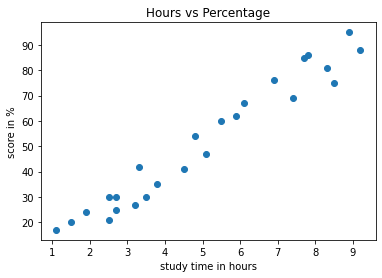

In [3]:
# Plotting the distribution of scores
plt.scatter(x=data['Hours'],y=data['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('study time in hours')  
plt.ylabel('score in %')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X = data.iloc[:, :-1].values #taking hours data in X variable 
y = data.iloc[:,1: ].values  #taking percentage data in Y variable

In [5]:
X #checking wheither data store in x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [6]:
y #checking wheither data store in y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

Now that we have our attributes(hours) and labels(percentage obtained), the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) # 20% is the test data and 80% is the train data

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [8]:
from sklearn.linear_model import LinearRegression  
model=LinearRegression()  
model.fit(X_train, y_train) 
model
print("Training complete.")

Training complete.


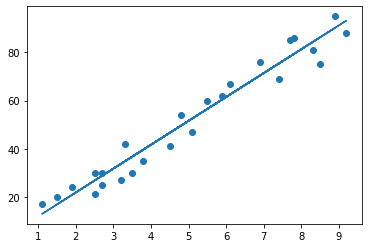

In [9]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
print(X_test) # Testing data - In Hours


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [63]:
y_pred = model.predict(X_test) # Predicting the scores
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns = {0:'predicted'})

,predicted
0,16.884145
1,33.732261
2,75.357018
3,26.794801
4,60.491033


In [64]:
#y_test=pd.DataFrame(y_test)
y_test=pd.DataFrame(y_test)
y_test.rename(columns = {0:'tested'})

,tested
0,20
1,27
2,69
3,30
4,62


In [66]:
# Comparing Actual vs Predicted
df = pd.concat([y_pred,y_test],axis=1) 
df

,0,0
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


In [74]:
# You can also test with your own data
no_of_hour_study= [[9.3]]
own_pred = model.predict(no_of_hour_study)
print("No of Hours = {}".format(no_of_hour_study))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.3]]
Predicted Score = [94.18726531]


# **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [70]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
